<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("../../DATA/housing.data", header=None, names=names, delim_whitespace=True)

In [4]:
# Head

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Shape

data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

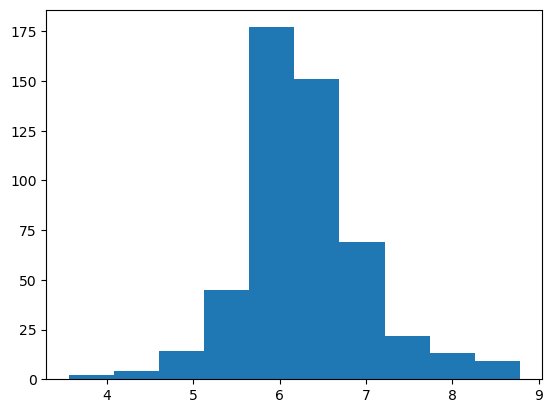

In [6]:
#  ANSWER

plt.hist(data['RM'])
plt.show()

##### 2. Plot Histogram of `MEDV`

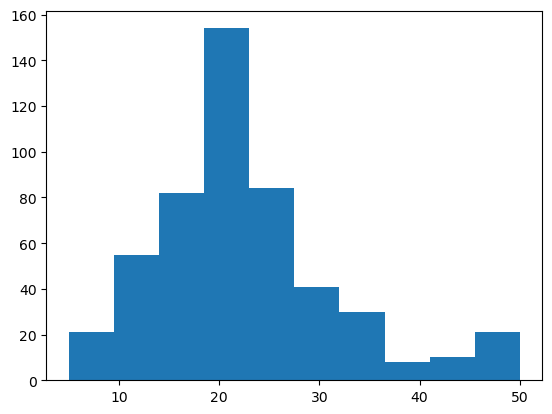

In [7]:
# ANSWER

plt.hist(data['MEDV'])
plt.show()

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

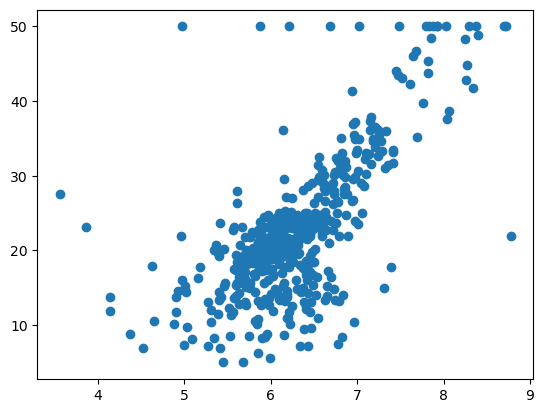

In [9]:
# ANSWER
x = data['RM']
y = data['MEDV']
plt.scatter(x, y,)
plt.show()

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

As RM increases, MEDV increases as a greater rate.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [10]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have less than 6 rooms.

Take sample of 100 houses in each dataset.

In [11]:
# ANSWER

large_house = data[data['RM']>=6].sample(100)
small_house = data[data['RM']<6].sample(100)

In [14]:
large_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52,17.1
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398.0,18.7,383.23,8.94,21.4
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

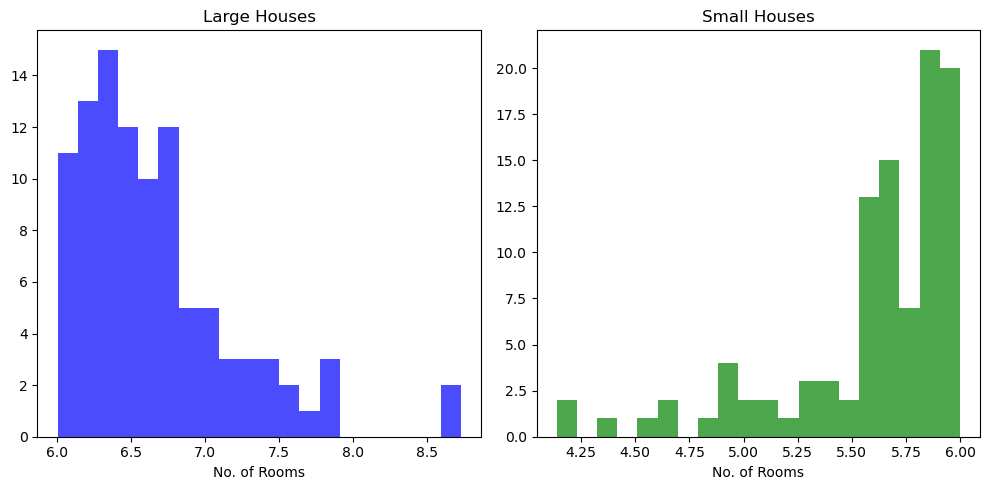

In [23]:
# ANSWER

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(large_house['RM'], bins=20, color='blue', alpha=0.7)
ax2.hist(small_house['RM'], bins=20, color='green', alpha=0.7)

ax1.set_title('Large Houses')
ax1.set_xlabel('No. of Rooms')
ax2.set_title('Small Houses')
ax2.set_xlabel('No. of Rooms')

plt.tight_layout()
plt.show()

##### 7. Calculate Variance

Calculate variance for both samples.

In [18]:
# ANSWER
lh = large_house['RM']
sh = small_house['RM']

In [20]:
var_lh = lh.var(ddof=1)
var_sh = sh.var(ddof=1)

print(var_lh)
print(var_sh)

0.2873405660606062
0.17409610212121215


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [26]:
# ANSWER

n1, n2 = len(lh), len(sh)
pooled_std = np.sqrt(((n1 - 1) * var_lh + (n2 - 1) * var_sh) / (n1 + n2 - 2))
print(pooled_std)

0.4803314835516294


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [27]:
# ANSWER

t = (lh.mean() - sh.mean())/(pooled_std*np.sqrt(2/n1))
print(t)

15.614656074405342


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [28]:
# ANSWER

dof = (len(lh) - 1) + (len(sh) - 1)
print(dof)

198


##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [33]:
# ANSWER

p_value = 2*(1 - stats.t.cdf(t, df=dof))
print(p_value)

0.0


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [34]:
# ANSWER

def significance_p(p_value, alpha):
    if p_value < alpha:
        print("The null hypothesis is rejected.")
    else:
        print("The null hypothesis is accepted")

In [36]:
# ANSWER

significance_p(p_value, alpha)

The null hypothesis is rejected.


In [ ]:
# ANSWER

# This indicates that there is a significant difference between the distributions of large houses and small houses. 

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [38]:
# ANSWER

def t_test(sample1, sample2, alpha):
    # Calculate the variance 
    var_sample1 = sample1.var(ddof=1)
    var_sample2 = sample2.var(ddof=1)
    
    # Calculate the pooled standard deviation
    n1, n2 = len(sample1), len(sample2)
    pooled_std = np.sqrt(((n1 - 1) * var_lh + (n2 - 1) * var_sh) / (n1 + n2 - 2))

    # Calculate the degrees of freedom
    dof = (len(sample1) - 1) + (len(sample2) - 1)

    # Calculate the p value
    p_value = 2*(1 - stats.t.cdf(t, df=dof))

    # Compare p value to alpha
    if p_value < alpha:
        print("The null hypothesis is rejected.")
    else:
        print("The null hypothesis is accepted")

In [39]:
t_test(lh, sh, 0.05)

The null hypothesis is rejected.


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [40]:
# ANSWER

stats.ttest_ind(lh, sh)

TtestResult(statistic=15.614656074405346, pvalue=2.3507636375728867e-36, df=198.0)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



